In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.callbacks import EvalCallback
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import CheckpointCallback
from gymnasium import spaces
import torch

## Load Traffic Environment

In [2]:
# Add the `src` folder to the Python path
sys.path.append(os.path.join(os.path.abspath('..'), 'src'))
import environment_gym as env_gym

## Create Evaluation and Test Function

In [3]:
def evaluate_model(log_path):
    """
    Reads the mean reward from the evaluation log and plots it to monitor convergence.

    Args:
    - log_path (str): Path to the directory containing the log file.
    """
    # Find the monitor CSV file generated by EvalCallback
    monitor_file = os.path.join(log_path, 'evaluations.npz')

    if not os.path.isfile(monitor_file):
        print("Error: Log file not found.")
        return

    # Load evaluation results
    results = np.load(monitor_file)
    mean_rewards = results['results'].mean(axis=1)  # Mean reward per evaluation

    # Plot the mean reward to observe convergence
    plt.plot(mean_rewards)
    plt.xlabel('Evaluation Step (x1000 timesteps)')
    plt.ylabel('Mean Reward')
    plt.title('Model Convergence')
    plt.show()

In [4]:
def test_model(model_path, env, num_episodes):
    """
    Evaluates the model over a specified number of episodes, records rewards for each episode,
    and plots the rewards.

    Args:
    - model_path (str): Path to the saved model.
    - env (gym.Env): The environment to evaluate the model on.
    - num_episodes (int): Total number of episodes to run the evaluation.

    Returns:
    - episode_rewards (list): List of total rewards for each episode.
    """
    # Load the model
    model = PPO.load(model_path)

    # Initialize a list to store rewards for each episode
    episode_rewards = []

    # Run the model for the specified number of episodes
    for episode in range(num_episodes):
        obs, info = env.reset()
        episode_reward = 0  

        while True:  # Run until the episode ends
            action, _states = model.predict(obs, deterministic=True)
            action = action.item()
            obs, reward, terminated, truncated, info = env.step(action)
            episode_reward += reward  # Accumulate reward

            # Check if the episode is done
            if terminated or truncated:
                episode_reward = round(episode_reward)
                episode_rewards.append(episode_reward)  # Record total reward for the episode
                break  # Exit the loop to start a new episode

    # Calculate average reward
    reward_ave = round(sum(episode_rewards) / num_episodes)
    print(f"Average reward of {num_episodes} episodes is {reward_ave}.")
    
    # Plot the episode rewards
    plt.plot(episode_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Rewards per Episode')
    plt.show()

    return episode_rewards

## Baseline PPO Agent

In [5]:
# Initialize and vectorize the environment for parallel processing
env = env_gym.TrafficEnvironment()
check_env(env, warn=True)
env.reset()

eval_env = Monitor(env_gym.TrafficEnvironment())
check_env(eval_env, warn=True)
eval_env.reset()

# Define the PPO model with MlpPolicy (a policy network that works well with continuous environments)
model = PPO("MlpPolicy", env, verbose=1, device="cpu")

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/ppo_baseline_model',
    log_path='./logs/baseline_results',
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Eval num_timesteps=1000, episode_reward=-15867.28 +/- 13245.10
Episode length: 1987.00 +/- 1324.29
----------------------------------
| eval/              |           |
|    mean_ep_length  | 1.99e+03  |
|    mean_reward     | -1.59e+04 |
| time/              |           |
|    total_timesteps | 1000      |
----------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-5564.96 +/- 10640.97
Episode length: 957.20 +/- 1063.60
----------------------------------
| eval/              |           |
|    mean_ep_length  | 957       |
|    mean_reward     | -5.56e+03 |
| time/              |           |
|    total_timesteps | 2000      |
----------------------------------
New best mean reward!
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 454       |
|    ep_rew_mean     | -2.04e+03 |
| time/              |           |
|

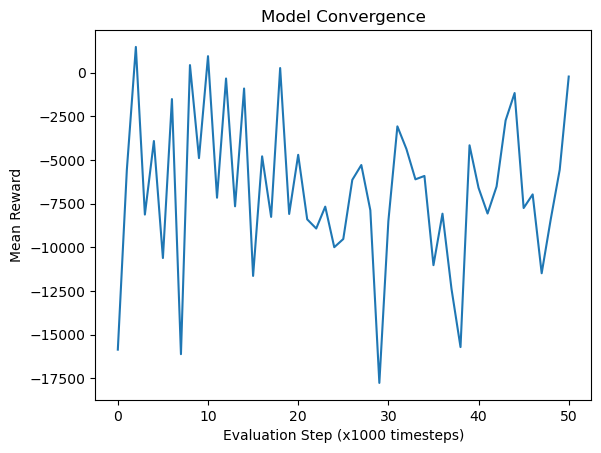

In [6]:
evaluate_model(log_path='./logs/baseline_results')

Average reward of 100 episodes is -6253.


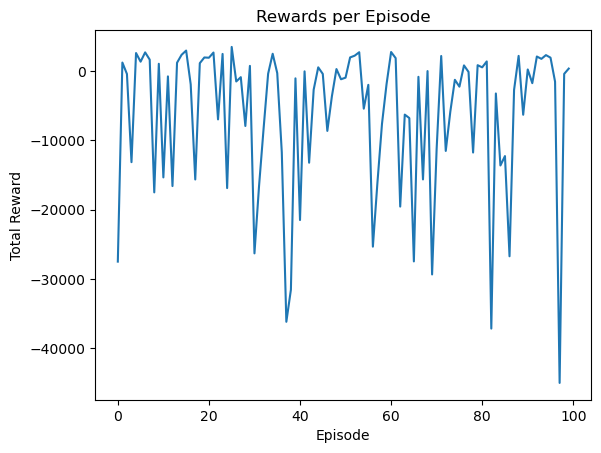

[-27509,
 1211,
 -436,
 -13160,
 2584,
 1337,
 2678,
 1633,
 -17520,
 1034,
 -15359,
 -784,
 -16609,
 1182,
 2328,
 2940,
 -1930,
 -15659,
 1121,
 1944,
 1907,
 2655,
 -6989,
 2455,
 -16899,
 3466,
 -1518,
 -898,
 -7940,
 732,
 -26320,
 -16660,
 -8350,
 -400,
 2480,
 -308,
 -11730,
 -36190,
 -31560,
 -1069,
 -21510,
 -58,
 -13240,
 -2700,
 521,
 -427,
 -8650,
 -3660,
 272,
 -1199,
 -969,
 1949,
 2202,
 2701,
 -5440,
 -2004,
 -25350,
 -16100,
 -7628,
 -1908,
 2732,
 1850,
 -19568,
 -6299,
 -6797,
 -27480,
 -847,
 -15650,
 -19,
 -29360,
 -11219,
 2157,
 -11539,
 -5880,
 -1279,
 -2269,
 801,
 -139,
 -11770,
 830,
 521,
 1374,
 -37170,
 -3250,
 -13639,
 -12280,
 -26739,
 -2729,
 2173,
 -6319,
 214,
 -1764,
 2081,
 1744,
 2284,
 1917,
 -1549,
 -45010,
 -424,
 340]

In [7]:
# Model testing
model_path = './logs/ppo_baseline_model/best_model.zip'
env_test = env_gym.TrafficEnvironment()
num_episodes = 100
test_model(model_path=model_path, env=env, num_episodes=num_episodes)

## Finetune PPO Agent

In [8]:
# Initialize and vectorize the environment
env = env_gym.TrafficEnvironment()
env.reset()
eval_env = Monitor(env_gym.TrafficEnvironment())
eval_env.reset()

# Set up evaluation callback
eval_callback = EvalCallback(
    eval_env,
    best_model_save_path='./logs/ppo_finetune_model',
    log_path='./logs/finetune_results',
    eval_freq=1000,  # Evaluate the model every 1000 steps
    deterministic=True,
    render=False
)

# Define the PPO model with MlpPolicy
model = PPO(
    "MlpPolicy", 
    env, 
    verbose=1,
    device = "cpu",
    learning_rate=2e-4,         
    n_steps=4096,               
    batch_size=128,              
    gae_lambda=0.95,            
    gamma=0.99,                 
    clip_range=0.1,
    # clip_range_vf=0.1,
    n_epochs=20,
    # ent_coef=0.005,
    # target_kl=0.01
)

# Train the PPO model
total_timesteps = 50000
model.learn(total_timesteps=total_timesteps, callback=eval_callback)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Eval num_timesteps=1000, episode_reward=472.78 +/- 1734.09
Episode length: 353.00 +/- 173.24
---------------------------------
| eval/              |          |
|    mean_ep_length  | 353      |
|    mean_reward     | 473      |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=492.54 +/- 1313.87
Episode length: 351.40 +/- 130.85
---------------------------------
| eval/              |          |
|    mean_ep_length  | 351      |
|    mean_reward     | 493      |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
New best mean reward!
Eval num_timesteps=3000, episode_reward=-3131.12 +/- 4931.84
Episode length: 713.60 +/- 492.88
----------------------------------
| eval/              |           |
|    mean_ep_length  | 714       |


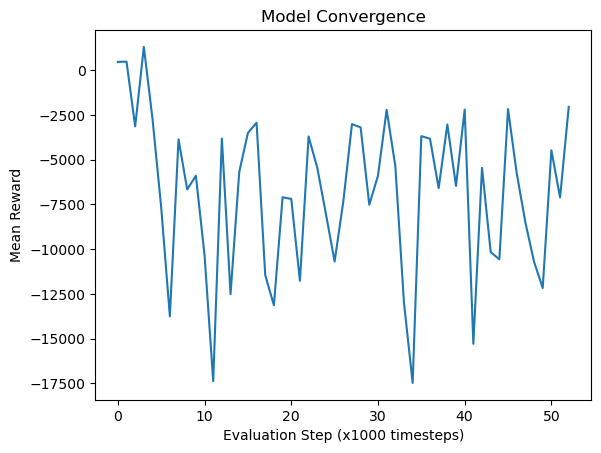

In [9]:
evaluate_model(log_path='./logs/finetune_results')

Average reward of 200 episodes is -6023.


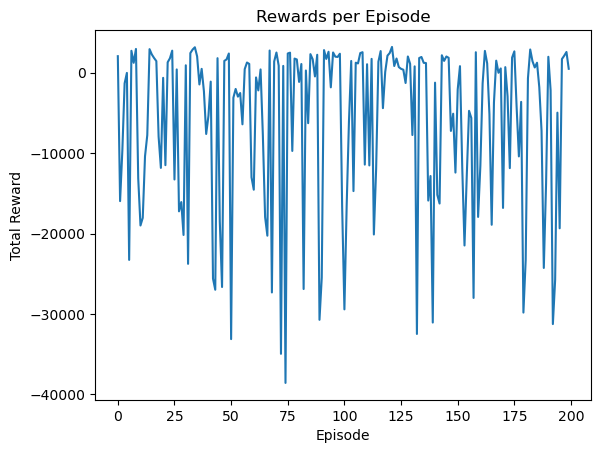

[2063,
 -15959,
 -9639,
 -1312,
 -16,
 -23270,
 2734,
 1238,
 2963,
 -13120,
 -18988,
 -18040,
 -10389,
 -7749,
 2941,
 2280,
 1836,
 1454,
 -7939,
 -11829,
 -628,
 -11489,
 1303,
 1808,
 2749,
 -13269,
 416,
 -17230,
 -16080,
 -20170,
 932,
 -23760,
 2446,
 2886,
 3174,
 2037,
 -1450,
 488,
 -2308,
 -7609,
 -5340,
 -1099,
 -25589,
 -26980,
 1815,
 -18470,
 -26640,
 1476,
 1668,
 2399,
 -33119,
 -3099,
 -2009,
 -2966,
 -2518,
 -6409,
 452,
 1278,
 1101,
 -12999,
 -14540,
 -578,
 -2189,
 417,
 -7680,
 -17940,
 -20258,
 2768,
 -27318,
 1405,
 2520,
 880,
 -34950,
 856,
 -38568,
 2399,
 2500,
 -9720,
 1766,
 1656,
 -1135,
 1091,
 -26890,
 284,
 -6268,
 2321,
 1681,
 -454,
 2240,
 -30719,
 -25470,
 2819,
 1723,
 2618,
 -1810,
 2527,
 2001,
 1969,
 2371,
 -16660,
 -29420,
 -16490,
 -6110,
 1469,
 -14712,
 1254,
 1164,
 2452,
 2559,
 -11419,
 1063,
 -11520,
 1730,
 -20110,
 -11949,
 1375,
 2699,
 -4400,
 93,
 2129,
 2458,
 3216,
 841,
 1774,
 711,
 491,
 382,
 -1269,
 2030,
 1109,
 -7740,
 8

In [10]:
# Model testing
model_path = './logs/ppo_finetune_model/best_model.zip'
env_test = env_gym.TrafficEnvironment()
num_episodes = 200
test_model(model_path=model_path, env=env, num_episodes=num_episodes)

HPO

In [ ]:
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
from stable_baselines3.common.monitor import Monitor
from stable_baselines3 import PPO
import numpy as np
import torch

# Parameter grid search -Don
param_grid = {
    'policy': ['MlpPolicy'],
    'learning_rate': [3e-4, 2.5e-4, 2e-4],
    'n_steps': [2048, 4096],
    'batch_size': [64, 128],
    'gamma': [0.99, 0.995],
    'gae_lambda': [0.95, 0.98],
    'n_epochs': [10, 20],
    'ent_coef': [0.0, 0.005],
    'clip_range': [0.2, 0.3],
    'policy_kwargs': [
        dict(net_arch=[dict(pi=[64, 64], vf=[64, 64])]),
        dict(net_arch=[dict(pi=[128, 128], vf=[128, 128])])
    ]
}

def evaluate_model(model, eval_env, n_eval_episodes=50):
    """
    Evaluate a trained model.
    """
    episode_rewards = []
    for _ in range(n_eval_episodes):
        obs, info = eval_env.reset()
        total_reward = 0
        while True:
            action, _ = model.predict(obs, deterministic=True)
            # Convert numpy array action to integer
            action = action.item() if isinstance(action, np.ndarray) else action
            obs, reward, terminated, truncated, info = eval_env.step(action)
            total_reward += reward
            if terminated or truncated:
                episode_rewards.append(total_reward)
                break
    
    mean_reward = np.mean(episode_rewards)
    std_reward = np.std(episode_rewards)
    return mean_reward, std_reward, episode_rewards

# Create environments
env = env_gym.TrafficEnvironment()
eval_env = Monitor(env_gym.TrafficEnvironment())

# Initialize tracking variables
best_reward = -float('inf')
best_params = None
best_model_path = "./best_model"
all_results = []

# Calculate total combinations
total_combinations = np.prod([len(v) for v in param_grid.values()])
print(f"Total parameter combinations to try: {total_combinations}")
current_combination = 0

# Main grid search loop
for params in ParameterGrid(param_grid):
    current_combination += 1
    print(f"\nTrying combination {current_combination}/{total_combinations}")
    print(f"Parameters: {params}")
    
    try:
        # Create and train model
        model = PPO(
            params['policy'], 
            env, 
            learning_rate=params['learning_rate'],
            n_steps=params['n_steps'],
            batch_size=params['batch_size'],
            gamma=params['gamma'],
            gae_lambda=params['gae_lambda'],
            n_epochs=params['n_epochs'],
            ent_coef=params['ent_coef'],
            clip_range=params['clip_range'],
            policy_kwargs=params['policy_kwargs'],
            verbose=0
        )
        
        model.learn(total_timesteps=50000)
        
        # Evaluate model
        mean_reward, std_reward, episode_rewards = evaluate_model(model, eval_env)
        print(f"Mean reward: {mean_reward:.2f} ± {std_reward:.2f}")

        # Store results
        all_results.append({
            'params': params,
            'mean_reward': mean_reward,
            'std_reward': std_reward
        })

        # Update best parameters if necessary
        if mean_reward > best_reward:
            best_reward = mean_reward
            best_params = params
            model.save(best_model_path)
            print(f"New best model found with reward {best_reward:.2f}!")
            
    except Exception as e:
        print(f"Error with parameters {params}: {str(e)}")
        continue

# Print final results
print("\nGrid search completed!")
print(f"Best parameters found: {best_params}")
print(f"Best reward: {best_reward:.2f}")

# Create visualization
plt.figure(figsize=(15, 6))
means = [r['mean_reward'] for r in all_results]
stds = [r['std_reward'] for r in all_results]
configs = range(len(means))

plt.errorbar(configs, means, yerr=stds, fmt='o', capsize=5)
plt.xlabel('Configuration Number')
plt.ylabel('Mean Reward')
plt.title('Performance of Different Parameter Configurations')
plt.grid(True)
plt.tight_layout()
plt.show()

# Save results
with open('grid_search_results.txt', 'w') as f:
    f.write("Grid Search Results:\n\n")
    f.write(f"Best parameters: {best_params}\n")
    f.write(f"Best reward: {best_reward:.2f}\n\n")
    f.write("All configurations:\n")
    for i, result in enumerate(all_results):
        f.write(f"\nConfiguration {i+1}:\n")
        f.write(f"Parameters: {result['params']}\n")
        f.write(f"Mean reward: {result['mean_reward']:.2f} ± {result['std_reward']:.2f}\n")

Total parameter combinations to try: 768

Trying combination 1/768
Parameters: {'batch_size': 64, 'clip_range': 0.2, 'ent_coef': 0.0, 'gae_lambda': 0.95, 'gamma': 0.99, 'learning_rate': 0.0003, 'n_epochs': 10, 'n_steps': 2048, 'policy': 'MlpPolicy', 'policy_kwargs': {'net_arch': [{'pi': [64, 64], 'vf': [64, 64]}]}}
Mean reward: -5535.22 ± 10643.72
New best model found with reward -5535.22!

Trying combination 2/768
Parameters: {'batch_size': 64, 'clip_range': 0.2, 'ent_coef': 0.0, 'gae_lambda': 0.95, 'gamma': 0.99, 'learning_rate': 0.0003, 'n_epochs': 10, 'n_steps': 2048, 'policy': 'MlpPolicy', 'policy_kwargs': {'net_arch': [{'pi': [128, 128], 'vf': [128, 128]}]}}
Mean reward: -5067.50 ± 10272.64
New best model found with reward -5067.50!

Trying combination 3/768
Parameters: {'batch_size': 64, 'clip_range': 0.2, 'ent_coef': 0.0, 'gae_lambda': 0.95, 'gamma': 0.99, 'learning_rate': 0.0003, 'n_epochs': 10, 'n_steps': 4096, 'policy': 'MlpPolicy', 'policy_kwargs': {'net_arch': [{'pi': [64,